## MTH9875 Homework 8

## Chenyu Zhao

### R version: 3.5.1

Assigned: October 24, 2019.
Due: November 7, 2019 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Allen Chen (allen.long.chen@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### Download some R-code


In [3]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/10/9875-8.zip", destfile="9875-8.zip")
unzip(zipfile="9875-8.zip")

In [4]:
source("BlackScholes.R")
source("Lewis.R")
source("roughHestonPade.R")

In [5]:
library(repr)
options(repr.plot.height=5)

### 0. (0 points) 

Read Chapter 6 of The Volatility Surface. 

## The Kou double-exponential jump diffusion model


In the Kou model, the underlying follows a jump-diffusion process of the form

$$
x_t=\alpha\,t+\sigma\,W_t+\sum_{i=1}^{N_t}\,y_i
$$

where $\{N_t\}$ is the Poisson process counting the jumps of $x$, and $y_i$ are jump sizes.  The distribution of jump sizes is an asymmetric exponential with density

<a name="eq:KouDensity"></a>(1)
$$
\nu(x)=p\,\lambda_+\,e^{-\lambda_+\,x}\,{\mathbb 1}_{x>0}+(1-p)\,\lambda_-\,e^{+\lambda_-\,x}\,{\mathbb 1}_{x \leq 0}.
$$

### 1. (2 points)

Conditional on an up-jump, what is the expected size of the jump?


$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
$$



### Answer

$$\mathbb{E}[x|x>0]=\frac{\int_0^\infty xv(x)}{\int_0^\infty v(x)}=\frac{\int_0^\infty px\lambda_+e^{-\lambda_+x}}{\int_0^\infty p\lambda_+e^{-\lambda_+x}}=\frac{1}{\lambda_+}$$

### 2. (8 points) 

Using the Lévy Khintchine formula, derive the characteristic function 
$
\phi_T(u)=\exp\{\psi(u)\,T\}
$
with

<a name="eq:KouPsi"></a>(2)
$$
\psi(u)=-\frac{\sigma^2}{2}\,u^2+i\,\omega\,u+i\,u\,\lambda\,\left\{\frac{p}{\lambda_+-i\,u}-\frac{1-p}{\lambda_-+i\,u}\right\}
$$

where $\lambda$ is the mean jump arrival rate and

$$
\omega=-\frac{\sigma^2}{2}-\lambda\,\left\{\frac{p}{\lambda_+-1}-\frac{1-p}{\lambda_-+1}\right\}.
$$

$\psi(u)$ is known as the *characteristic exponent* of the Lévy process.

### Answer

From Lévy Khintchine formula, we have

$$
\phi_T(u)=\exp\{iu\omega T-\frac12u^2\sigma^2T+T\int[e^{iu\xi}-1]\mu(\xi)d\xi\}
$$

Using $\mu=\lambda v$, the integration part is 
\begin{eqnarray}
\int[e^{iu\xi}-1]\mu(\xi)d\xi&=&\int_{-\infty}^0 \lambda \left(e^{iux}-1\right)(1-p)\lambda_{-}e^{\lambda_- x}dx +
\int_0^{\infty} p\lambda \lambda_{+} \left( e^{iux}-1\right)e^{-\lambda_{+}x}dx \\
&=&i\,u\,\lambda\,\left\{\frac{p}{\lambda_+-i\,u}-\frac{1-p}{\lambda_-+i\,u}\right\}
\end{eqnarray}

So  from $\phi_T(u)=\exp\{\psi(u)\,T\}$, we have 

$$
\psi(u)=-\frac{\sigma^2}{2}\,u^2+i\,\omega\,u+i\,u\,\lambda\,\left\{\frac{p}{\lambda_+-i\,u}-\frac{1-p}{\lambda_-+i\,u}\right\}
$$

Using the martingale condition $\phi_T(-i)=1$, we have

$$
\psi(-i)=-\frac{\sigma^2}{2}+\omega-\lambda\left\{\frac{p}{\lambda_+-i\,u}-\frac{1-p}{\lambda_-+i\,u}\right\}=0
$$

we finally have

$$
\omega=-\frac{\sigma^2}{2}-\lambda\,\left\{\frac{p}{\lambda_+-1}-\frac{1-p}{\lambda_-+1}\right\}.
$$

### 3. (6 points) 

Use the characteristic exponent [(2)](#eq:KouPsi) and Lewis's formula (6) from Lecture 8 as implemented in `Lewis.R` to plot the one-year Kou model implied volatility smile assuming the following parameters:

$$
\sigma=0.1; \,\lambda=1.0;\,p=0.25;\,\lambda_-=8;\,\lambda_+=25;
$$

The log-strike range should be from $k=-1.0$ to $k=1.0$.  

In [6]:
character_fun <- function(params){
    sig<-params$sig
    lambda<-params$lambda
    p<-params$p
    lambda_p<-params$lambda_p
    lambda_n<-params$lambda_n
    ans <- function(u,t){
        omega<--0.5*sig*sig-lambda*(p/(lambda_p-1)-(1-p)/(lambda_n+1))
        psi<--0.5*sig*sig*u*u+(0+1i)*omega*u+(0+1i)*u*lambda*(p/(lambda_p-(0+1i)*u)-(1-p)/(lambda_n+(0+1i)*u))
        return(exp(psi*t))
    }
    return(ans)
}

paramsKou<-list(sig=0.1,lambda=1,p=0.25,lambda_n=8,lambda_p=25)

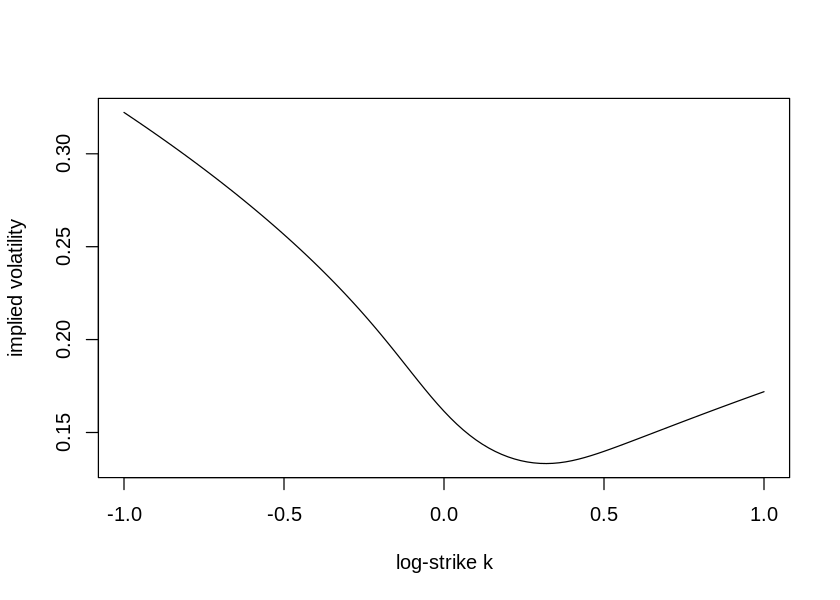

In [37]:
impvol <- function(k){sapply(k,function(x){impvol.phi(character_fun(paramsKou))(x,1)})}
curve(impvol(x),from=-1.0,to=1.0, xlab="log-strike k", ylab="implied volatility")

## Jump-Diffusion Monte Carlo

### 4. (10 points) 

(a) 
Write Monte Carlo code to price European options in the Kou model. 

(b) With the same parameters as in Problem 3, run your Monte Carlo code with $T=1$ year and 2 million paths.

(c) 
Use your output from (b) to plot the one-year implied volatility smile from $k=-1.0$ to $k=1.0$.  

(d) Superimpose your plot from (c) on the exact smile from Problem 3.  Verify that you obtain the same implied volatilities.

### Answer

(a)

In [10]:
Kou_MC <- function(params, k, T, N, steps){   
    # drift term is 0
    mu <- 0
    # S0 = 1
    K <- exp(k)     
    dt <- T / steps
    
    sig<-params$sig
    lambda<-params$lambda
    p<-params$p
    lambda_p<-params$lambda_p
    lambda_n<-params$lambda_n
    
    Jump <- function(n, p, lambda_p, lambda_n){
        prob <- runif(n, min=0, max=1)
        lambda_pList <- rep(lambda_p, n)
        lambda_nList <- rep(lambda_n, n)
        lambda_List <- (prob < p)*lambda_p + (prob >= p)*lambda_n  
        exp<- rexp(n, rate=lambda_List)        
        ans <- sum((prob < p)*exp - (prob >= p)*exp)

        return (ans)
    }
 
    one_step <- function(x)
    {
        BMs <- rnorm(N)
        Nts <- rpois(N, lambda * dt)
        BMs <- BMs - mean(BMs)
        BMs <- BMs/sd(BMs)       
        jumps <- sapply(Nts, function(Nt){Jump(Nt, p, lambda_p, lambda_n)})        
        x <- x + mu * dt + sig * sqrt(dt) * BMs + jumps     
        x <- x - log(mean(exp(x)))       
        return(x)
    }

    x <- numeric(N)
    
    for (i in 1:steps){
        x <- one_step (x)        
    }
    
    ST <- exp(x) 
    payoff <- (ST > K) * (ST - K)   
    res <- mean(payoff)   
    return(res)
}

(b)

In [31]:
N <- 2000000 
Kou_MC_vec <- Vectorize(function(k){sapply(k, function(x){Kou_MC(paramsKou, x, 1.0, N, 4)})})

Ks <- seq(-1.0,1.0,0.01)
res <- sapply(Ks, Kou_MC_vec)

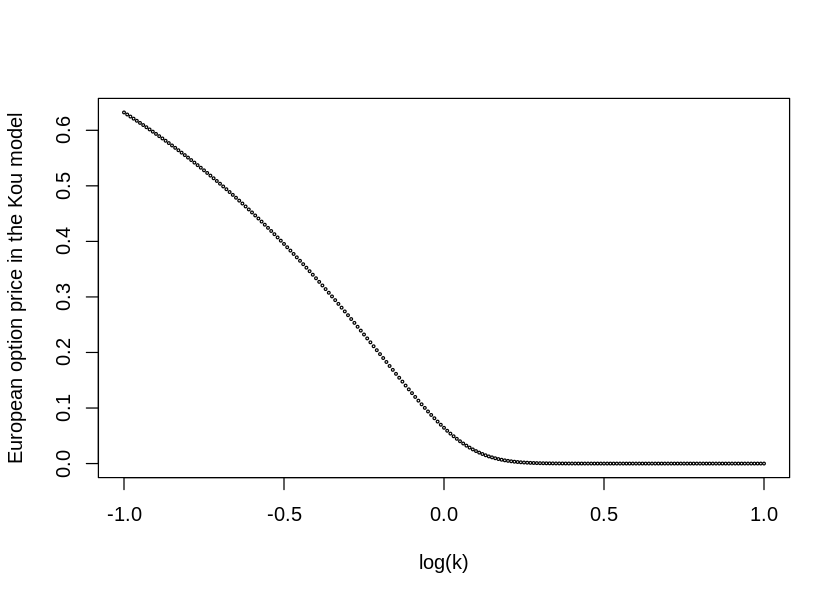

In [32]:
plot(Ks, res, ylab="European option price in the Kou model",xlab="log(k)",cex=0.3)

(c)

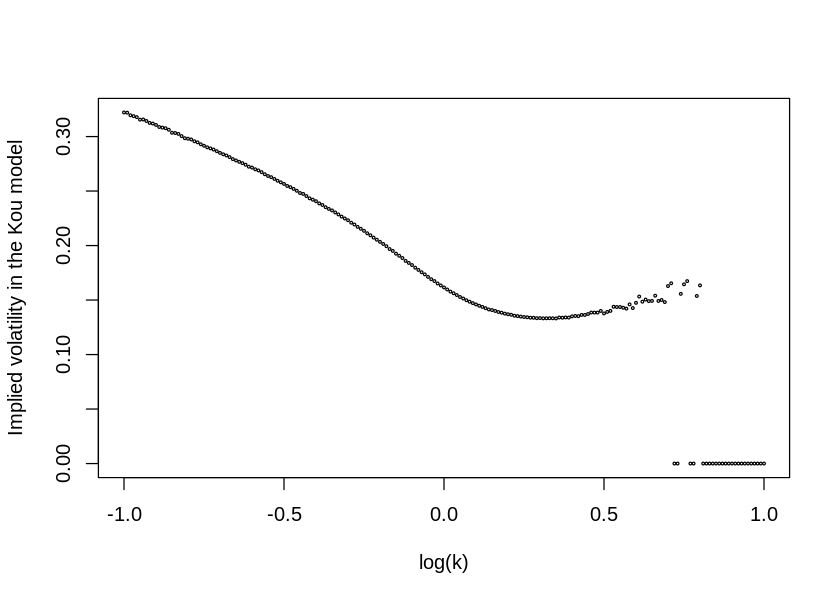

In [35]:
strikes <- exp(Ks)
n <- length(strikes)
impvol_MC <- numeric(n)
for (i in 1:n){
    impvol_MC[i] = BSImpliedVolCall(S0=1, K=strikes[i], T=1, r=0, C=res[i])
}

plot(Ks, impvol_MC, ylab="Implied volatility in the Kou model",xlab="log(k)",cex=0.3)

(d)

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”

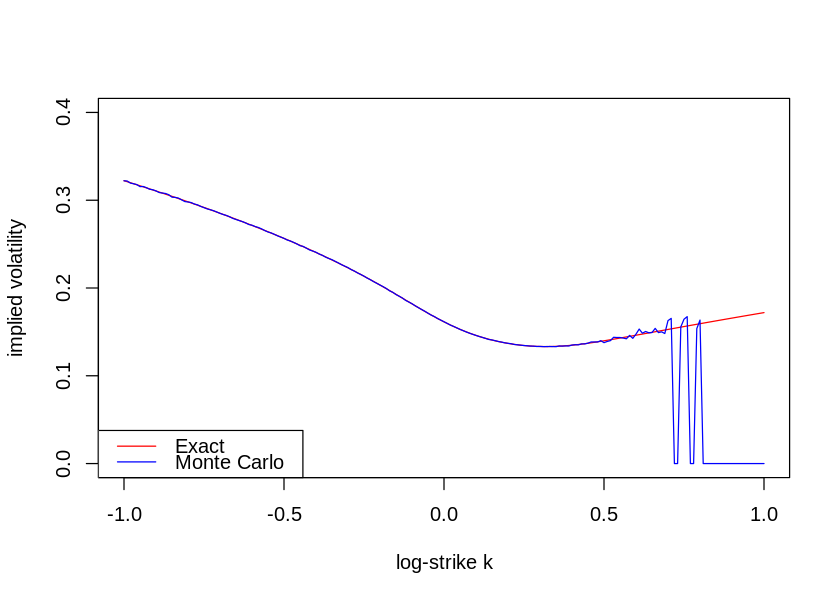

In [41]:
curve(impvol(x),from=-1.0,to=1.0, xlab="log-strike k", ylab="implied volatility", col='red', ylim=c(0,0.4))
lines(Ks, impvol_MC, col="blue", add=TRUE) 
legend("bottomleft",c("Exact","Monte Carlo"),lty=1,col=c("red", "blue"))

They overlap with each other, so we obtain the same implied volatilities

## Term structure of ATM skew

### 5. (16 points) 

(a) Implement in R the ATM volatility skew using formula (8) from the lecture notes:

\begin{equation}
\left.\frac{\partial \sigma_{BS} }{\partial k }\right|_{k=0}=-
e^{\frac{\sigma_{BS}^2 T}{8}} \sqrt{\frac{2}{ \pi}}\frac{1}{
\sqrt{T}}\,\int_0^\infty\,du \, \frac{u\,
\mathrm{Im}\left[\phi_T(u-i/2)\right]}
{u^2+\frac{1}{4}},
\end{equation}


Your function should look like 

`atmSkew.phi <- function(phi)function(t){...}`

Remember to vectorize this function!

(b) Use your function `atmSkew.phi` to plot the Kou model ATM volatility skew with Kou parameters from Problem 3,  from 0 to 10 years.  


(c) Using the rough Heston parameters

$$
H=0.05; \eta=0.1; \rho=-.65;
$$

with a flat forward variance curve $\xi = 0.035$, superimpose the rough Heston ATM skew curve on the plot from part (b).  Use the Padé 3-3 approximation as in 

`phi.rHeston <- phiRoughHestonDhApprox(params.rHeston, xiCurve, dh.approx= d.h.Pade33, n=20)`.

(d) 

Superimpose a plot of the function $\psi_1/T^{.45}$ where $\psi_1$ is the rough Heston model 1-year ATM volatility skew.  Why did I choose the exponent $0.45$?

(e) Which model is more realistic: Kou or rough Heston?  Why?

### Answer

(a)

In [42]:
atmSkew.phi <- function(phi){       
    ans <- function(t){
        sig_BS <- impvol.phi(phi)(1,t) 
        integrand<-function(u){u*Im(phi(u - 1i/2, t)/(u^2 + 1/4))}
        res <- -exp(sig_BS^2*t/8)*sqrt(2/pi/t)*integrate(integrand,lower=0,upper=Inf)$value
        return(res)
    }   
    return(ans)
}

atmSkew_Kou <- Vectorize(atmSkew.phi(character_fun(paramsKou)))

(b)

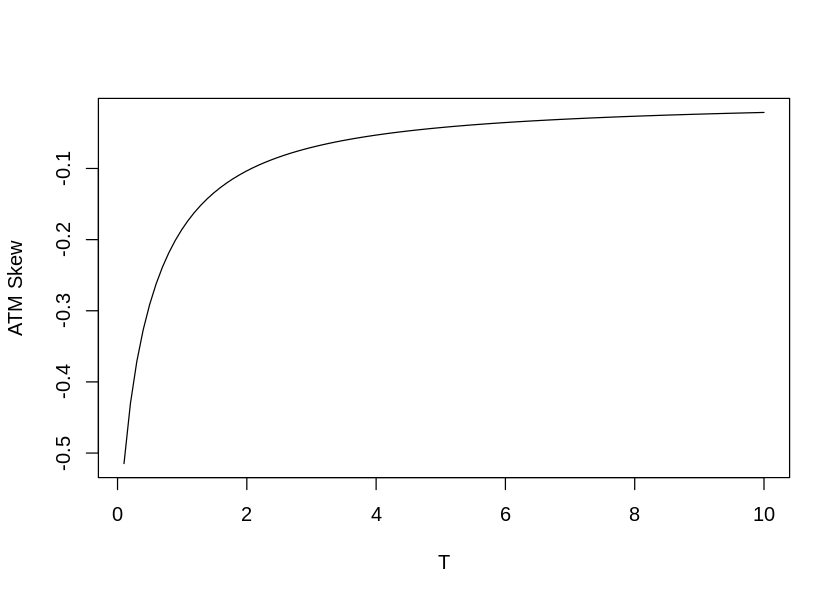

In [43]:
curve(atmSkew_Kou(x),from=0.1,to=10, xlab="T", ylab="ATM Skew")

(c)

In [50]:
params.rHeston <- list(H=0.05,nu=0.15,rho=-0.65,eta=0.1)
xiCurve <- function(t){0.035+0*t}
phi.rHeston <- phiRoughHestonDhApprox(params.rHeston, xiCurve, dh.approx= d.h.Pade33, n=20)

atmSkew_rHeston = Vectorize(atmSkew.phi(phi.rHeston))

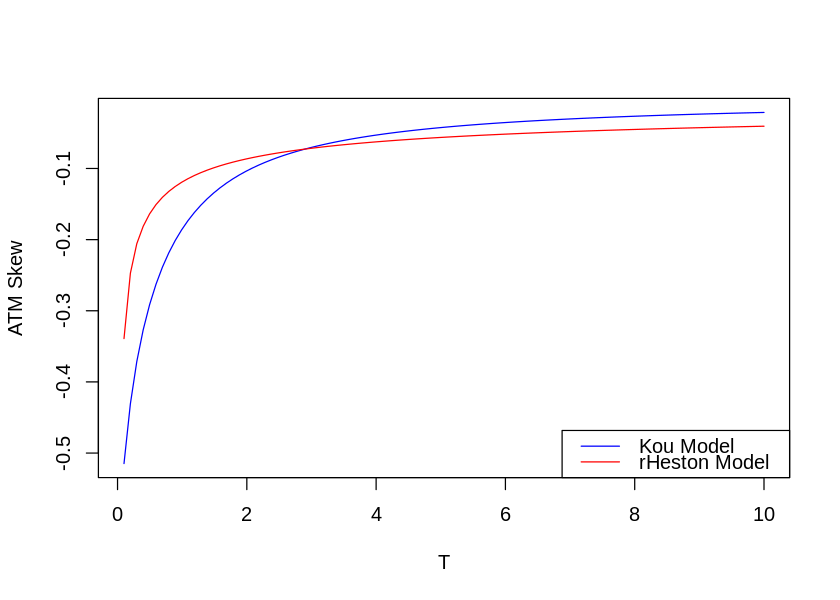

In [51]:
curve(atmSkew_Kou(x),from=0.1,to=10,col="blue",xlab="T", ylab="ATM Skew")
curve(atmSkew_rHeston(x),from=0.1,to=10,col="red", add=TRUE)
legend("bottomright",c("Kou Model","rHeston Model"),lty=1, col=c("blue", "red"))

(d)

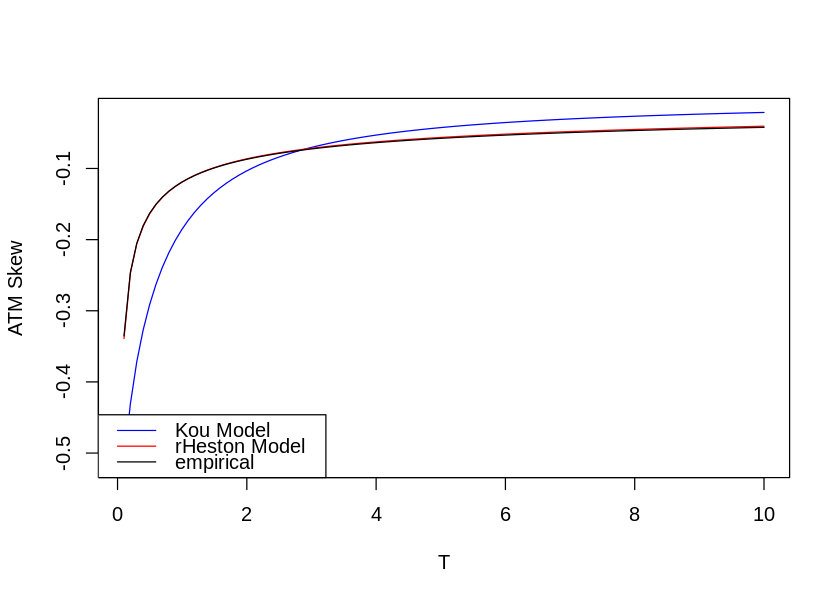

In [52]:
curve(atmSkew_Kou(x),from=0.1,to=10,col="blue",xlab="T", ylab="ATM Skew")
curve(atmSkew_rHeston(x),from=0.1,to=10,col="red", add=TRUE)
curve(atmSkew_rHeston(1) / x^0.45, from=0.1,to=10, add=TRUE)
legend("bottomleft",c("Kou Model","rHeston Model","empirical"),lty=1, col=c("blue", "red", "black"))

The reason to choose 0.45 is because $0.45=\frac12-H=0.5-0.05$

(e)

I think Rough Heston model is more realistic, because forward variance curve includes path information. also it is closer to power-law empirical observation.

### 6. (6 points)  

Explain qualitatively to a non-specialist (*e.g.* your boss who is a trader) what happens to the volatility surface when there is a large negative jump in the Kou model.  Compare this to what happens in the rough Heston model when there is a large negative move in the underlying.

### Answer

In Kou model. because in Levy process, price changes are independent, so large negative jump would actually not affect the volatility surface. 

In rough Heston, volatility surface will have positive move, when large negative move happens in the underlying, because the volatility and spot price are negative correlated